In [14]:
import numpy as np
import xarray as xr
import pandas as pd
import holoviews as hv
import geoviews as gv
import iris
import cartopy

from cartopy import crs
from cartopy import feature as cf
from geoviews import feature as gf

hv.notebook_extension('bokeh','matplotlib')
# %output backend='matplotlib'
# %opts Feature [projection=crs.Robinson()]


In [15]:
iris.FUTURE.netcdf_promote=True
iris_ensemble = iris.load_cube('/d4/yzhou/Drought_atlas/ANZDA/anzda.nc')
print iris_ensemble.summary()

Palmer Drought Severity Index DJF / (1) (time: 513; longitude: 85; latitude: 72)
     Dimension coordinates:
          time                               x               -             -
          longitude                          -               x             -
          latitude                           -               -             x
     Attributes:
          file_author: Yuxin Zhou yzhou@ldeo.columbia.edu
          history: Original data downloaded from https://www.ncdc.noaa.gov/cdo/f?p=519:1:0::::P1_STUDY_ID:20245....
          reference: Jonathan G. Palmer, Edward R. Cook, Chris S.M. Turney, Kathy Allen, Pavla...
          title: Eastern Australia and New Zealand Drought Atlas (ANZDA)


In [16]:
import iris.coord_categorisation as coord_cat
coord_cat.add_year(iris_ensemble, 'time')

In [17]:
iris_dataset = gv.Dataset(iris_ensemble)
print repr(iris_dataset)

:Dataset   [time,longitude,latitude]   (Palmer Drought Severity Index DJF)


In [18]:
iris_ensemble.metadata

CubeMetadata(standard_name=None, long_name=u'Palmer Drought Severity Index DJF', var_name=u'pdsi', units=Unit('1'), attributes={'title': 'Eastern Australia and New Zealand Drought Atlas (ANZDA)', 'file_author': 'Yuxin Zhou yzhou@ldeo.columbia.edu', 'reference': "Jonathan G. Palmer, Edward R. Cook, Chris S.M. Turney, Kathy Allen, Pavla Fenwick, Benjamin I. Cook, Alison O'Donnell, Janice Lough, Pauline Grierson, Patrick Baker. 2015. Drought variability in the eastern Australia and New Zealand summer drought atlas (ANZDA, CE 1500-2012) modulated by the Interdecadal Pacific Oscillation. Environmental Research Letters, 10(12). doi: 10.1088/1748-9326/10/12/124002", 'history': 'Original data downloaded from https://www.ncdc.noaa.gov/cdo/f?p=519:1:0::::P1_STUDY_ID:20245. Created Sat Oct 15 01:32:01 2016'}, cell_methods=())

In [19]:
iris_ensemble.summary()

u'Palmer Drought Severity Index DJF / (1) (time: 513; longitude: 85; latitude: 72)\n     Dimension coordinates:\n          time                               x               -             -\n          longitude                          -               x             -\n          latitude                           -               -             x\n     Auxiliary coordinates:\n          year                               x               -             -\n     Attributes:\n          file_author: Yuxin Zhou yzhou@ldeo.columbia.edu\n          history: Original data downloaded from https://www.ncdc.noaa.gov/cdo/f?p=519:1:0::::P1_STUDY_ID:20245....\n          reference: Jonathan G. Palmer, Edward R. Cook, Chris S.M. Turney, Kathy Allen, Pavla...\n          title: Eastern Australia and New Zealand Drought Atlas (ANZDA)'

:DynamicMap   [time]
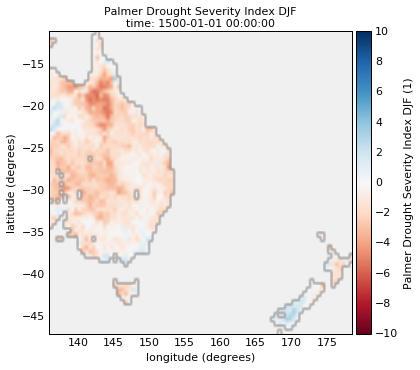

In [20]:
%%opts Image (cmap='RdBu',clims=(-10,10))
# %output backend='bokeh'
%output backend='matplotlib'
%opts Image [colorbar=True]
%output size=150
iris_dataset.to(gv.Image, kdims=['longitude', 'latitude'], dynamic=True)

In [21]:
from eofs.iris import Eof
# create a solver class, taking advantage of built-in weighting
solver = Eof(iris_ensemble)

# retrieve the first few EOFs from the solver class
eofs = solver.eofs(neofs=5)

:HoloMap   [eof_number]
   :Image   [longitude,latitude]   (empirical_orthogonal_functions)
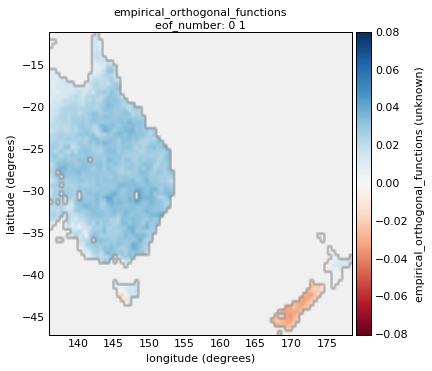
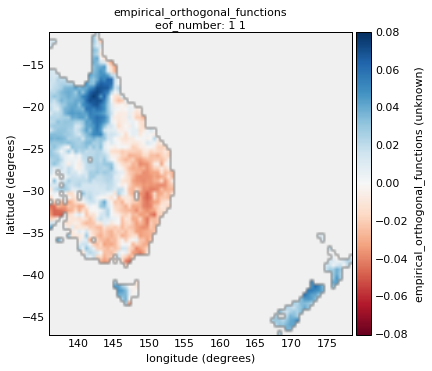
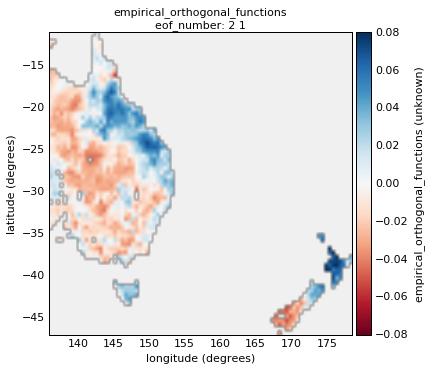
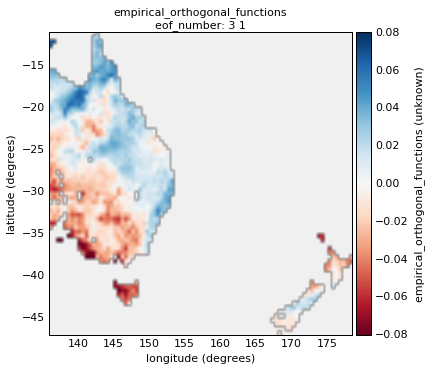
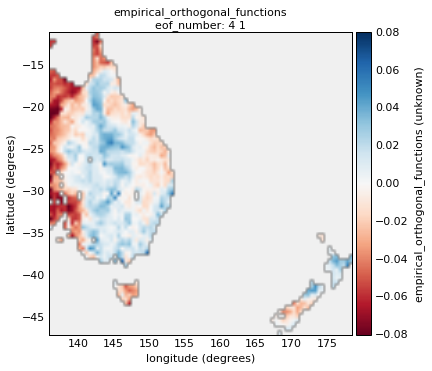

In [22]:
%%opts Image (cmap='RdBu',clims=(-0.08,0.08))
eofs_dataset = gv.Dataset(eofs)
eofs_dataset.to(gv.Image, kdims=['longitude', 'latitude'])

In [23]:
pcs = solver.pcs(npcs=5, pcscaling=1)

In [24]:
pcs.coords()

[DimCoord(array([ 547509.,  547875.,  548240.,  548605.,  548970.,  549336.,
         549701.,  550066.,  550431.,  550797.,  551162.,  551527.,
         551892.,  552258.,  552623.,  552988.,  553353.,  553719.,
         554084.,  554449.,  554814.,  555180.,  555545.,  555910.,
         556275.,  556641.,  557006.,  557371.,  557736.,  558102.,
         558467.,  558832.,  559197.,  559563.,  559928.,  560293.,
         560658.,  561024.,  561389.,  561754.,  562119.,  562485.,
         562850.,  563215.,  563580.,  563946.,  564311.,  564676.,
         565041.,  565407.,  565772.,  566137.,  566502.,  566868.,
         567233.,  567598.,  567963.,  568329.,  568694.,  569059.,
         569424.,  569790.,  570155.,  570520.,  570885.,  571251.,
         571616.,  571981.,  572346.,  572712.,  573077.,  573442.,
         573807.,  574173.,  574538.,  574903.,  575268.,  575634.,
         575999.,  576364.,  576729.,  577095.,  577460.,  577815.,
         578180.,  578546.,  578911.,  

:HoloMap   [pc_number]
   :Curve   [time]   (principal_components)
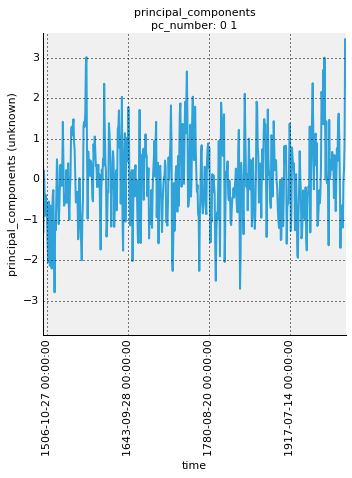
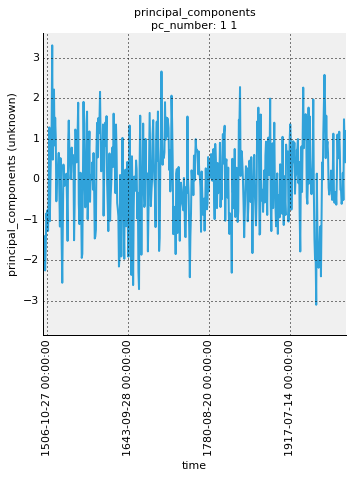
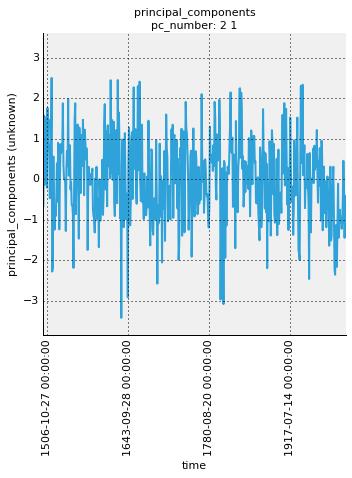
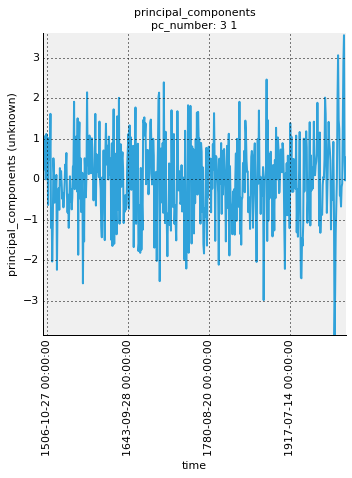
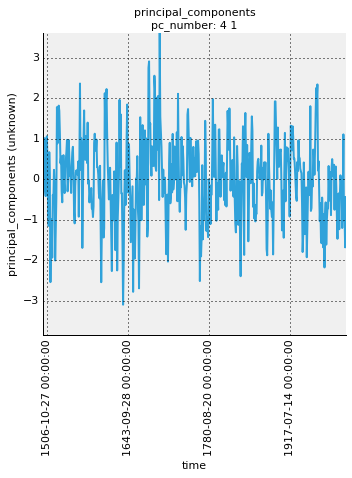

In [29]:
%%opts Curve [xrotation=90]
hv_dataset = hv.Dataset(pcs)
hv_dataset.to(hv.Curve,kdims=['time'])